In [2]:
import pandas as pd
df = pd.read_excel("data.xlsx", sheet_name="data")
df.head()

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene
0,2019-01-01 00:00:00,0.548004,0.837675,0.386063,0.183578,0.377457,0.311067,0.099945,0.59,0.008504,0.391534
1,2019-01-01 00:15:00,0.548004,0.837675,0.447938,0.177646,0.426394,0.304088,0.088901,0.60,0.011006,0.373016
2,2019-01-01 00:30:00,0.548004,0.837675,0.385062,0.201686,0.382471,0.333500,0.088349,0.52,0.011006,0.365079
3,2019-01-01 00:45:00,0.448759,0.658317,0.440328,0.196691,0.426394,0.331007,0.085036,0.54,0.011006,0.359788
4,2019-01-01 01:00:00,0.448759,0.658317,0.422307,0.175148,0.404332,0.327517,0.083932,0.50,0.011131,0.333333


(25791840.0, 25837920.0)

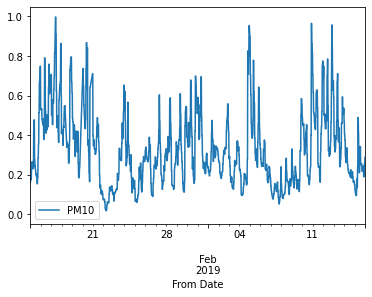

In [11]:
from sktime.utils.plotting import plot_series

df.plot(x ='From Date', y='PM10').set_xlim(pd.Timestamp('2019-01-15'), pd.Timestamp('2019-02-16'))

In [17]:
df = df.set_index('From Date')
dflag7 = pd.DataFrame()
for i in range(7,0,-1):
    for col in df.columns:
	    dflag7['t-'+str(i)+col] = df[col].shift(i).values[:]
for col in df.columns:
    dflag7['t-0'+col] = df[col].values[:]


KeyError: "None of ['From Date'] are in the columns"

In [18]:
dflag7.head(8)

,t-7PM2.5,t-7PM10,t-7NO,t-7NO2,t-7NOx,t-7NH3,t-7SO2,t-7CO,t-7Ozone,t-7Benzene,...,t-0PM2.5,t-0PM10,t-0NO,t-0NO2,t-0NOx,t-0NH3,t-0SO2,t-0CO,t-0Ozone,t-0Benzene
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.548004,0.837675,0.386063,0.183578,0.377457,0.311067,0.099945,0.59,0.008504,0.391534
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.548004,0.837675,0.447938,0.177646,0.426394,0.304088,0.088901,0.60,0.011006,0.373016
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.548004,0.837675,0.385062,0.201686,0.382471,0.333500,0.088349,0.52,0.011006,0.365079
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.448759,0.658317,0.440328,0.196691,0.426394,0.331007,0.085036,0.54,0.011006,0.359788
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.448759,0.658317,0.422307,0.175148,0.404332,0.327517,0.083932,0.50,0.011131,0.333333
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.448759,0.658317,0.393072,0.194817,0.386883,0.331007,0.081171,0.45,0.011256,0.335979
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.448759,0.658317,0.272928,0.222292,0.296831,0.357428,0.081171,0.30,0.011381,0.309524
7,0.548004,0.837675,0.386063,0.183578,0.377457,0.311067,0.099945,0.59,0.008504,0.391534,...,0.382956,0.591182,0.204646,0.211364,0.238067,0.322532,0.075097,0.27,0.011506,0.272487


In [20]:
dflag7.index = df.index
dflag7.head(8)

,t-7PM2.5,t-7PM10,t-7NO,t-7NO2,t-7NOx,t-7NH3,t-7SO2,t-7CO,t-7Ozone,t-7Benzene,...,t-0PM2.5,t-0PM10,t-0NO,t-0NO2,t-0NOx,t-0NH3,t-0SO2,t-0CO,t-0Ozone,t-0Benzene
From Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.548004,0.837675,0.386063,0.183578,0.377457,0.311067,0.099945,0.59,0.008504,0.391534
2019-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.548004,0.837675,0.447938,0.177646,0.426394,0.304088,0.088901,0.60,0.011006,0.373016
2019-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.548004,0.837675,0.385062,0.201686,0.382471,0.333500,0.088349,0.52,0.011006,0.365079
2019-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.448759,0.658317,0.440328,0.196691,0.426394,0.331007,0.085036,0.54,0.011006,0.359788
2019-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.448759,0.658317,0.422307,0.175148,0.404332,0.327517,0.083932,0.50,0.011131,0.333333
2019-01-01 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.448759,0.658317,0.393072,0.194817,0.386883,0.331007,0.081171,0.45,0.011256,0.335979
2019-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.448759,0.658317,0.272928,0.222292,0.296831,0.357428,0.081171,0.30,0.011381,0.309524
2019-01-01 01:45:00,0.548004,0.837675,0.386063,0.183578,0.377457,0.311067,0.099945,0.59,0.008504,0.391534,...,0.382956,0.591182,0.204646,0.211364,0.238067,0.322532,0.075097,0.27,0.011506,0.272487


In [22]:
dflag7=dflag7[13:]
dflag7.to_excel("datalagged7days.xlsx", sheet_name="data")

In [26]:
dflag16 = pd.DataFrame()
for i in range(16,0,-1):
    for col in df.columns:
	    dflag16['t-'+str(i)+col] = df[col].shift(i).values[:]
for col in df.columns:
    dflag16['t-0'+col] = df[col].values[:]
dflag16.index = df.index
dflag16.head(17)


,t-16PM2.5,t-16PM10,t-16NO,t-16NO2,t-16NOx,t-16NH3,t-16SO2,t-16CO,t-16Ozone,t-16Benzene,...,t-0PM2.5,t-0PM10,t-0NO,t-0NO2,t-0NOx,t-0NH3,t-0SO2,t-0CO,t-0Ozone,t-0Benzene
From Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.548004,0.837675,0.386063,0.183578,0.377457,0.311067,0.099945,0.59,0.008504,0.391534
2019-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.548004,0.837675,0.447938,0.177646,0.426394,0.304088,0.088901,0.60,0.011006,0.373016
2019-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.548004,0.837675,0.385062,0.201686,0.382471,0.333500,0.088349,0.52,0.011006,0.365079
2019-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.448759,0.658317,0.440328,0.196691,0.426394,0.331007,0.085036,0.54,0.011006,0.359788
2019-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.448759,0.658317,0.422307,0.175148,0.404332,0.327517,0.083932,0.50,0.011131,0.333333
2019-01-01 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.448759,0.658317,0.393072,0.194817,0.386883,0.331007,0.081171,0.45,0.011256,0.335979
2019-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.448759,0.658317,0.272928,0.222292,0.296831,0.357428,0.081171,0.30,0.011381,0.309524
2019-01-01 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.382956,0.591182,0.204646,0.211364,0.238067,0.322532,0.075097,0.27,0.011506,0.272487
2019-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.382956,0.591182,0.184622,0.209179,0.221119,0.303838,0.067780,0.25,0.009005,0.211640


In [27]:
dflag16.to_excel("datalagged16.xlsx", sheet_name="data")

In [30]:
dflag16 = dflag16[17:]
array = dflag16.values
X = array[:,0:-10]
y = array[:,-10:]

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [32]:
model.fit(X, y)

LinearRegression()

In [36]:
row = X[5]
yhat = model.predict([row])
print(yhat[0])

[0.04812296 0.23158462 0.00310825 0.08425433 0.03042521 0.24074717
 0.11413613 0.07721941 0.38312176 0.06025999]


In [37]:
print(y[5])

[0.04746494 0.23346693 0.00420505 0.06650016 0.02547132 0.23778664
 0.13197129 0.08       0.3971986  0.06349206]


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9581261361750248


In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

KNregr = KNeighborsRegressor()
DTregr = DecisionTreeRegressor()

KNregr.fit(X_train,y_train)
DTregr.fit(X_train,y_train)



DecisionTreeRegressor()

In [42]:
print("Linear Regression: " + str(regr.score(X_test, y_test)) + "\nk-Nearest Neighbors: " + str(KNregr.score(X_test, y_test)) +"\nDecision Tree Regressor: "+str(DTregr.score(X_test, y_test)))

Linear Regression: 0.9581261361750248
k-Nearest Neighbors: 0.9369093648907126
Decision Tree Regressor: 0.8416144196041311


In [53]:
from sklearn.multioutput import RegressorChain
from sklearn.svm import LinearSVR

svrregr = LinearSVR(epsilon = 0.1, max_iter=200000)

wrapper = RegressorChain(svrregr)

wrapper.fit(X_train, y_train)

RegressorChain(base_estimator=LinearSVR(epsilon=0.1, max_iter=200000))

In [56]:
print("SVR: " + str(wrapper.score(X_test, y_test)))

SVR: 0.8444477518904032
